In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# for simplicity's sake
# basit bir anlatım için bu noktaları kullanacağım
lines = [
  (50, 50, 40, 35),
  (52, 52, 42, 37),
  (38, 30, 25, 15),
]

In [3]:
# noktalarımızı birleştirim yeşil renkli doğrular oluşturuyorum.
for x1, y1, x2, y2 in lines:
    plt.plot((x1, x2), (y1, y2), 'g')

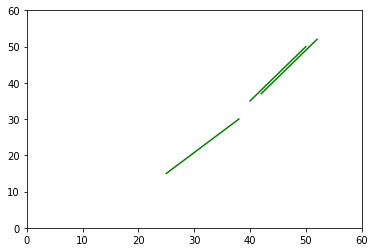

In [4]:
# 2 boyutlu düzlemin ölçülerini belirle
plt.axis([0, 60, 0, 60])
plt.show()

In [4]:
# The goal is to have one straight line from the top right corner 
# to all the way down.
# First, separate x and y points.
# Amaç, sağ üst köşeden sol alt köşeye uzanan bir doğru parçası çizmek
# önce, x ve y noktalarını ayır
x = []
y = []
for x1, y1, x2, y2 in lines:
    x += [x1, x2]
    y += [y1, y2]

In [5]:
print(x, y)

[50, 40, 52, 42, 38, 25] [50, 35, 52, 37, 30, 15]


In [7]:
# Then we can use np.polyfit to fit a line to these points. 
# A straight line can be represented with y = mx + b
# which is a polynomial of degree 1.
# Sonra np.polyfit() fonksiyonunu kullanarak noktalar üzerine 
# bir doğru parçası yerleştir.
# Düz bir doğru parçası y=mx+b şeklinde ifade edilebilir,
# Bu 1. dereceden polinomdur, bu yüzden 1 değerni yazıyoruz.
z = np.polyfit(x, y, 1)
print(z)
# we'll get:
# alacağımız sonuç:

[  1.40241735 -21.23284749]


In [8]:
# which are the coeficients for y = mx + b, 
# so m=1.40241735 and b=-21.23284749.
# bu değerler y=mx+b için katsayılardır,
# yani m=1.40241735 ve b=-21.23284749.
m, b = z

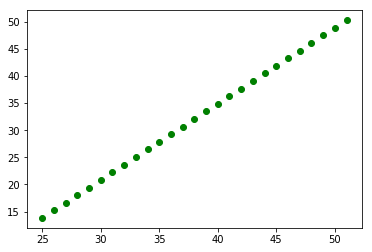

In [10]:
for i in range(min(x), max(x)):
    plt.plot(i, i * m + b, 'go')

plt.show()
# aşağıdaki şekilde görüldüğü gibi b dikey aksisdeki değeri,
# m ise doğrunun eğimini belirliyor.

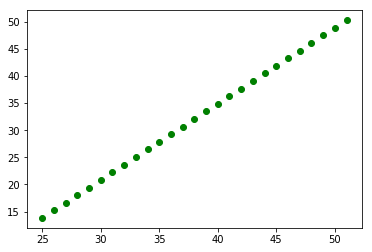

In [11]:
# numpy has a handy function np.poly1d which can 
# do the y = mx + b calculation for us.
# numpy'ın np.poly1d() foksiyonu y=mx+b hesaplamasını
# bizim için yapacaktır.
z = np.polyfit(x, y, 1)
f = np.poly1d(z)

for i in range(min(x), max(x)):
    plt.plot(i, f(i), 'go')

plt.show()

[(25, 13), (28, 18), (31, 22), (34, 26), (37, 30), (40, 34), (43, 39), (46, 43), (49, 47), (52, 51)]
10


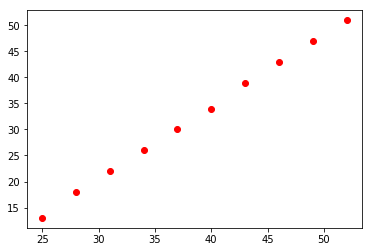

In [12]:
# Instead of using range, we could also use numpy's np.
# linspace to generate a number of points for us.
# range kullanmak yerine, yine numpy'ın np.linespace()
# fonksiyonunu kullanarak noktalarımızı oluşturabiliriz.
x_new = np.linspace(min(x), max(x), 10).astype(int)
y_new = f(x_new).astype(int)
points_new = list(zip(x_new, y_new))

print(points_new) 
# [(25, 13), (28, 18), (31, 22), (34, 26), (37, 30), (40, 34), 
# (43, 39), (46, 43), (49, 47), (52, 51)]
print(len(points_new)) # 10

for x, y in points_new:
    plt.plot(x, y, 'ro')

plt.show()

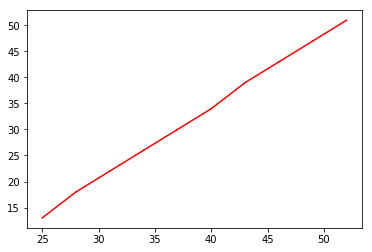

In [13]:
# We could plot these points as lines as follows:
# Bu noktaları bir doğru parçası olarak ifade edebiliriz
for i in range(1, len(points_new)):
    px, py = points_new[i-1]
    cx, cy = points_new[i]
    plt.plot((px, cx), (py, cy), 'r')

plt.show()

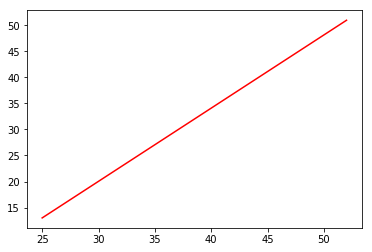

In [14]:
# Or make it just one straight line because that's what 
# we ultimately want.
# Ya da düz bir doğru parçası olarak,
# nihayetinde görmek istediğimizde bu zaten.
px, py = points_new[0]
cx, cy = points_new[-1]

plt.plot((px, cx), (py, cy), 'r')
plt.show()

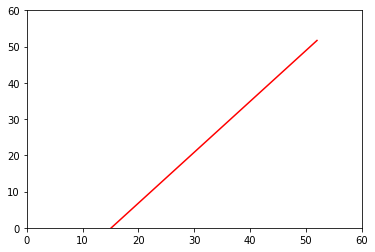

In [2]:
# If return to the original question, how do we extrapolate the lines?
# Since we got a straight line, we can simply plug in points 
# that are outside of our data set.
# Asıl soruya dönelim, bu çizgilerin dığ değerlerini nasıl buluruz?
# Zaten düz doğru var elimizde, yalnızca ...????
lines = [
  (50, 50, 40, 35),
  (52, 52, 42, 37),
  (38, 30, 25, 15),
]

x = []
y = []
for x1, y1, x2, y2 in lines:
    x += [x1, x2]
    y += [y1, y2]

z = np.polyfit(x, y, 1)
f = np.poly1d(z)

plt.plot((0, max(x)), (f(0), f(max(x))), 'r')

plt.axis([0, 60, 0, 60])
plt.show()

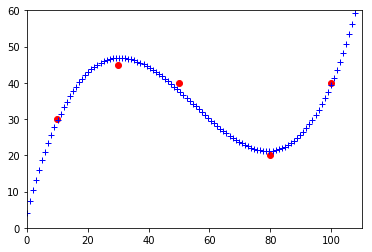

In [17]:
# By the way, np.polyfit can also fit more complex lines. 
# This time we need at least a polynomial of degree 3.
x = [10, 30, 50, 80, 100]
y = [30, 45, 40, 20,  40]

for x1, y1 in zip(x, y):
    plt.plot(x1, y1, 'ro')

z = np.polyfit(x, y, 3)
f = np.poly1d(z)

for x1 in np.linspace(0, 110, 110):
    plt.plot(x1, f(x1), 'b+')

plt.axis([0, 110, 0, 60])
plt.show()